In [1]:
import pandas as pd
import numpy as np
from functions import *
import matplotlib.pyplot as plt

d = r'C:/Users/fabrizio/Documents/R_data/PROJECTS/MASTER/DATA/KKA STMK NEU DE.xlsx'

data, trial = reader(d, 'Data Stmk', header=18, test=False)
data.dropna(how='all', axis=1,inplace=True)
data=cleaner(data,['Unnamed: 0', 'ID','Typ','Subtyp','Gewässer','Unnamed: 7','lfd.Nr.'])


In [2]:
data=data[~data.KG.isna()]
data=data.fillna(0)

In [3]:
conditions_tech = [
    data["Unbek."] == 1,
    data["Mehr-kammer"] == 1,
    data["Durchl."] == 1, #
    data["SBR"] == 1,
    data["MBR"] == 1,
    data["Tropf"] == 1,
    data["Fest"] == 1,
    data["BKF"] == 1,
    data["PKA"] == 1,
    data["Tauch"] == 1,
    data["Andere"] == 1,
]


outcome_tech = ['Unbekannt', '3-k', 'Bel.', 'SBR', 'MBR', 
                'Tropf', 'Fest',  'BKF', 'PKA',
                'Tauch', 'Andere']




In [4]:
data=logical_column(conditions_tech,outcome_tech,data,'tech_type')

<AxesSubplot:>

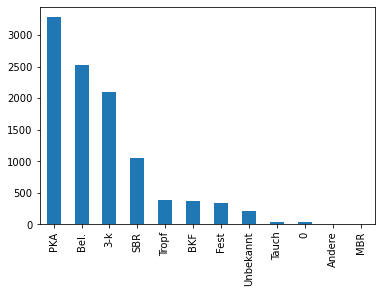

In [5]:
data.tech_type.value_counts().plot.bar()

In [6]:
conditions_bau = [
    data["Unbek."] == 1,
    data["Mechan."] == 1,
    data["Biolog"] == 1,
    data["Andere"] == 1,
    (data["Biolog"] == 1) & (data["Mechan."] == 1)
]

outcomes_bau = [
    "Unbekannt", "Mech", "Bio", "Andere", "Bio"
]

In [7]:
data=logical_column(conditions_bau,outcomes_bau,data,'bautyp')
tech_type=data[['Mehr-kammer', 'Durchl.',
       'SBR', 'MBR', 'Tropf', 'Tauch', 'Fest', 'PKA', 'BKF']]


bautyp=data[['Mechan.', 'Biolog', 'Andere', 'Unbek.',]]
data=col_dropper(data,tech_type,bautyp)

<AxesSubplot:>

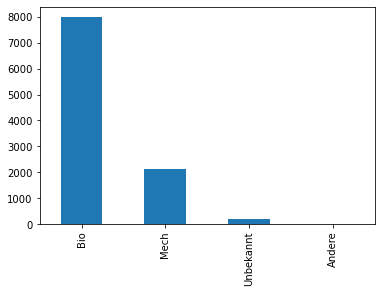

In [8]:
data.bautyp.value_counts().plot.bar()


In [9]:
data.tech_type.value_counts()


PKA          3283
Bel.         2525
3-k          2093
SBR          1044
Tropf         381
BKF           367
Fest          334
Unbekannt     218
Tauch          44
0              36
Andere         11
MBR             2
Name: tech_type, dtype: int64

In [14]:
data['KG_NR']=data.KG.str.split().str[0]
data['KG_name']=data.KG.str.split().str[1]



data.drop(columns=['KG'],inplace=True)

In [13]:
data.to_excel('output/Steyr.xlsx',index=False)